In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px




pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("../Data/loan.csv")
print(df.shape)
df.head()

(887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['loan_status'].value_counts()

loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [6]:
df.describe(include='all')  

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379,887379.000000,887379.000000,887379,887379,835917,842554,887379,8.873750e+05,887379,887379,887379,887379,887379,126026,887379,887226,887379,887379,887379.000000,887350.000000,887350,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,869720,887379.000000,634408,887326,887234.000000,221703.000000,887379.0,887379,511.000000,509.000000,511,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,299271,11,6,NaN,3,103,10,2,887379,124468,14,63143,935,51,NaN,NaN,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,100,103,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Oct-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2016,NaN,Feb-2016,Jan-2016,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,621125,NaN,NaN,254535,56323,13469,291569,443557,NaN,329558,48631,601779,887369,1,246,524215,414001,9770,129517,NaN,NaN,6659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470150,NaN,553406,730574,NaN,NaN,NaN,886868,NaN,NaN,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,NaN,13.246740,436.717127,NaN,NaN,NaN,NaN,NaN,7.502759e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.157039,0.314442,NaN,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,NaN,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,NaN,2164.145585,NaN,NaN,0.014380,44.104838,1.0,NaN,109981.011585,18.310118,NaN,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,NaN,4.381867,244.186593,NaN,NaN,NaN,NaN,NaN,6.469830e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.190626,0.862244,NaN,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,NaN,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,NaN,4794.783233,NaN,NaN,0.134191,22.179841,0.0,NaN,52730.379847,7.169233,NaN,0.077625,1.031137e+04,1.53

# Target

### Consolidating the target classes to binary. 


In Traditional banking industry a loan is considered to be in **Defauled** if it is 90 days past the due date.  "Late (16-30 days)", "Late (31-120 days)", and "In Grace Period" — are typically considered stages of delinquency, but not necessarily default.

Since my goal is to predict and mitigate the risk early I am going to consider any loan that has crossed the grace period as a default.

 
**Fully Paid : (Default = 0)**

Indicates that the borrower has successfully repaid the entire loan amount, including any interest or fees. The loan has been closed, and there is no outstanding balance.

**Charged Off : (Deafult = 1)**

Occurs when a borrower has defaulted on their loan and the lender considers the debt as unlikely to be fully repaid. The lender writes off the loan as a loss and typically reports it as such on their financial statements.

**Current : (Default = 0)**

Refers to a loan or credit account that is in good standing and has no missed payments or outstanding issues. The borrower is making regular payments according to the agreed-upon terms.


**Default : (Default = 1)**

Signifies a severe delinquency where the borrower has failed to make payments for an extended period. Defaulting on a loan can have serious consequences, including legal action and damage to the borrower's credit score.

**Late (31-120 days) : (Default = 1)**

Denotes that the borrower has missed multiple consecutive payments and is behind on their repayment schedule. The number in parentheses indicates the number of days the borrower is past due.

**In Grace Period : (Default = 0)**

Refers to a short period (typically a few days) after the payment due date during which the borrower can make a payment without incurring any late fees or penalties. It serves as a buffer to give the borrower some additional time to make the payment.

**Late (16-30 days) : (Default = 1)**

Similar to "Late (31-120 days)," this status signifies that the borrower has missed one or more payments, but the number of days past due is shorter.

**Does not meet the credit policy. Status:Fully Paid : (Default = 0)**

 Indicates that the loan or credit application was initially approved and funded, even though it did not meet the lender's standard credit policy. However, the borrower has successfully repaid the loan in full.

**Does not meet the credit policy. Status:Charged Off : (Default = 1)**

Indicates that the loan or credit application did not meet the lender's credit policy requirements and, as a result, the loan has been charged off as a loss because it is unlikely to be fully repaid.

**Issued : (These observations will be dropped as we never know the future payment behavior of these customers, and including them in the model will create a bias)** 

Indicates that a loan has been approved and the funds have been disbursed to the borrower. The borrower is now responsible for repaying the loan according to the agreed-upon terms.

In [7]:
x = df.shape[0]
df1 = df[df['loan_status']!= "Issued"]
print("Removed {} rows".format(x - df1.shape[0]))

Removed 8460 rows


In [8]:
defaulted_values  = ["Charged Off", "Default", "Late (31-120 days)", "Late (16-30 days)",
                     "Does not meet the credit policy. Status:Charged Off"]

df1['Default'] = [1 if x in defaulted_values else 0 for x in df1['loan_status']]

Dropping ID and member_id columns as they are unique identifiers and will not be useful for the model.

In [9]:
df1.drop(["id",'member_id'],axis = 1, inplace=True)

In [10]:
df1.head()  

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,Default
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
df1.shape

(878919, 73)

# Filtering features

In the given data, out of 71 independent features from the target, most of them will not be available during the time of application. So, I am going to filter the features that will be available during the time of application.

In [12]:
list(df1.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',

In [13]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# issued date,  will not be present at the time of loan application but I will keep it for future analysis and also to use it as a proxy for the time of loan application

available_features = ["loan_amnt","term","emp_title","emp_length",'home_ownership', 'annual_inc','verification_status',
                      "issue_d", 'purpose', "addr_state",'dti','delinq_2yrs',"earliest_cr_line","mths_since_last_delinq",
                      "mths_since_last_record","open_acc","revol_bal","revol_util","total_acc","application_type","dti_joint","annual_inc_joint","tot_cur_bal","loan_status", "Default"]

df1 = df1[available_features]
print(df1.shape)
df1.head()

(878919, 25)


,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,application_type,dti_joint,annual_inc_joint,tot_cur_bal,loan_status,Default
0,5000.0,36 months,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,credit_card,AZ,27.65,0.0,Jan-1985,NaN,NaN,3.0,13648.0,83.7,9.0,INDIVIDUAL,NaN,NaN,NaN,Fully Paid,0
1,2500.0,60 months,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,car,GA,1.00,0.0,Apr-1999,NaN,NaN,3.0,1687.0,9.4,4.0,INDIVIDUAL,NaN,NaN,NaN,Charged Off,1
2,2400.0,36 months,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,small_business,IL,8.72,0.0,Nov-2001,NaN,NaN,2.0,2956.0,98.5,10.0,INDIVIDUAL,NaN,NaN,NaN,Fully Paid,0
3,10000.0,36 months,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,other,CA,20.00,0.0,Feb-1996,35.0,NaN,10.0,5598.0,21.0,37.0,INDIVIDUAL,NaN,NaN,NaN,Fully Paid,0
4,3000.0,60 months,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,other,OR,17.94,0.0,Jan-1996,38.0,NaN,15.0,27783.0,53.9,38.0,INDIVIDUAL,NaN,NaN,NaN,Current,0


In [15]:
df1['mths_since_last_delinq'].isnull().sum()

450296

In [16]:
df1.describe(include='all')

,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,application_type,dti_joint,annual_inc_joint,tot_cur_bal,loan_status,Default
count,878919.000000,878919,828094,834725,878919,8.789150e+05,878919,878919,878919,878919,878919.000000,878890.000000,878890,428623.000000,135457.000000,878890.000000,8.789190e+05,878420.000000,878890.000000,878919,445.000000,447.000000,8.086430e+05,878919,878919.000000
unique,NaN,2,297555,11,6,NaN,3,103,14,51,NaN,NaN,697,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN
top,NaN,36 months,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Oct-2015,debt_consolidation,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,Current,NaN
freq,NaN,615143,13261,288752,439337,NaN,326722,48631,519419,128370,NaN,NaN,6600,NaN,NaN,NaN,NaN,NaN,NaN,878472,NaN,NaN,NaN,601779,NaN
mean,14750.034872,NaN,NaN,NaN,NaN,7.499591e+04,NaN,NaN,NaN,NaN,18.144543,0.314080,NaN,34.063793,70.180854,11.542266,1.691242e+04,55.102620,25.261623,NaN,18.343955,107313.593915,1.393934e+05,NaN,0.069604
std,8430.817752,NaN,NaN,NaN,NaN,6.468549e+04,NaN,NaN,NaN,NaN,17.250291,0.861522,NaN,21.884861,28.168401,5.311498,2.241053e+04,23.828764,11.834211,NaN,7.226108,47742.909108,1.536774e+05,NaN,0.254478
min,500.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,NaN,3.050000,17950.000000,0.000000e+00,NaN,0.000000
25%,8000.000000,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,11.900000,0.000000,NaN,15.000000,51.000000,8.000000,6.445500e+03,37.700000,17.000000,NaN,13.190000,75100.500000,2.983400e+04,NaN,0.000000
50%,13000.000000,NaN,NaN,NaN,NaN,6.480000e+04,NaN,NaN,NaN,NaN,17.640000,0.000000,NaN,31.000000,70.000000,11.000000,1.187500e+04,56.000000,24.000000,NaN,17.750000,100000.000000,8.049900e+04,NaN,0.000000
75%,20000.000000,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,23.930000,0.000000,NaN,50.000000,92.000000,14.000000,2.082300e+04,73.600000,32.000000,NaN,22.650000,130000.000000,2.081295e+05,NaN,0.000000


# EDA
Performing EDA on the filtered features to understand the data better.

Text(0.5, 1.0, 'Distribution of Loan Amount')

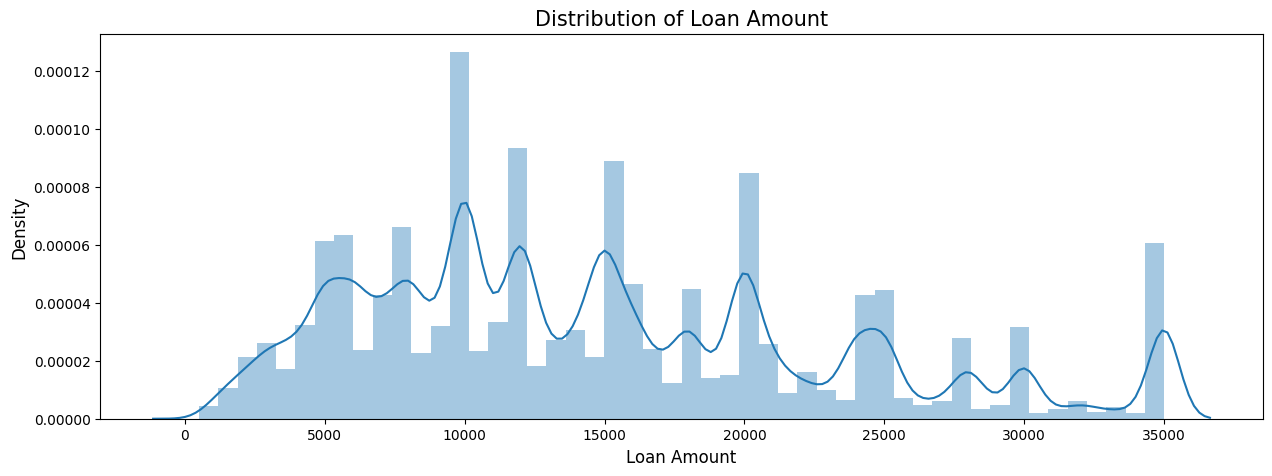

In [17]:
# understanding the distribution of loan amount
plt.figure(figsize=(15,5))
sns.distplot(df1['loan_amnt'])
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Loan Amount", fontsize=15)

Text(0.5, 1.0, 'Distribution of Term')

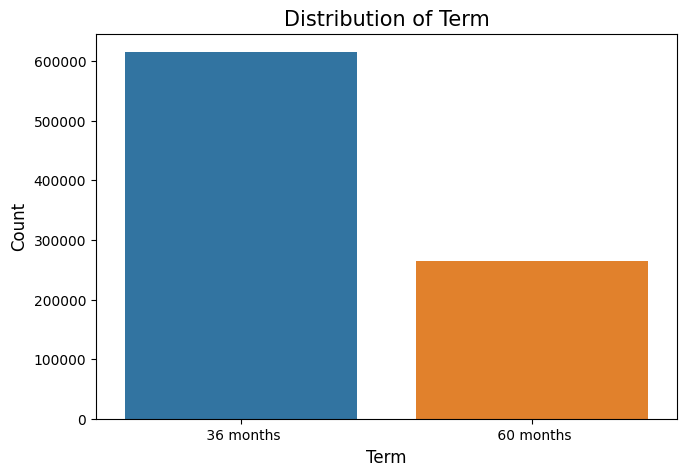

In [18]:
# understanding the distribution of term
plt.figure(figsize=(7.5,5))
vc = df1['term'].value_counts()
sns.barplot(x = vc.index, y=vc.values, palette="tab10")
plt.xlabel("Term", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Term", fontsize=15)

There are few trends that can be observed from the plots.

* $10,000 is the most common loan amount, followed by $15,000.
* Most of the popular loan amounts are in multiples of $5,000.
* 

In [19]:
# testing if emp_title is a good feature to use

df1.groupby('emp_title')['Default'].mean().sort_values(ascending=False).head(500)

emp_title
Team Acquisition                            1.0
Ast clinical nurse manager                  1.0
Elwyn New Jersey                            1.0
Ast Store Manager                           1.0
Ely State Prison                            1.0
Emagine Theater of Royal Oak                1.0
Email Marketing                             1.0
Emanuel hospital pharmacy                   1.0
Emar Systems Director                       1.0
Assy/Electro-Mechanical Tech 3              1.0
Embassy Suites Schaumburg                   1.0
new alternatives for children               1.0
Team-Lead                                   1.0
Team uspervisor                             1.0
Embedded Software Co.                       1.0
Embers Restaurant                           1.0
Assured Self Storage                        1.0
Assured Document Management                 1.0
Emcor Hyre Electric Co. of Indiana          1.0
new country motor car group (Mercedes Be    1.0
Emerald Logistics             

<Axes: xlabel='revol_util', ylabel='Density'>

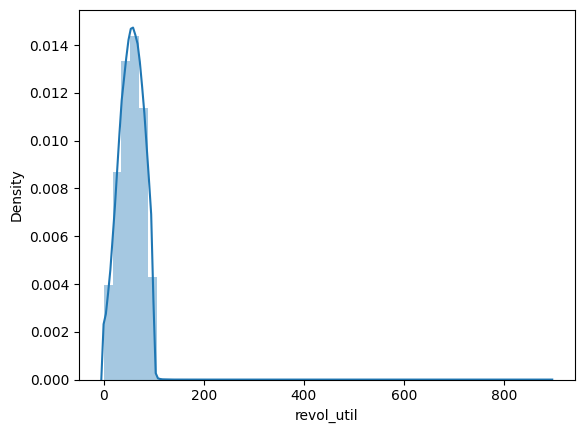

In [20]:
sns.distplot(df1['revol_util'])

In [21]:
# get the percentage of defaulters grouped by payment plan
df1.groupby('application_type')['Default'].mean()*100

application_type
INDIVIDUAL    6.963682
JOINT         0.447427
Name: Default, dtype: float64

In [22]:
df1['pymnt_plan'].value_counts() 

KeyError: 'pymnt_plan'

(0.0, 200000.0)

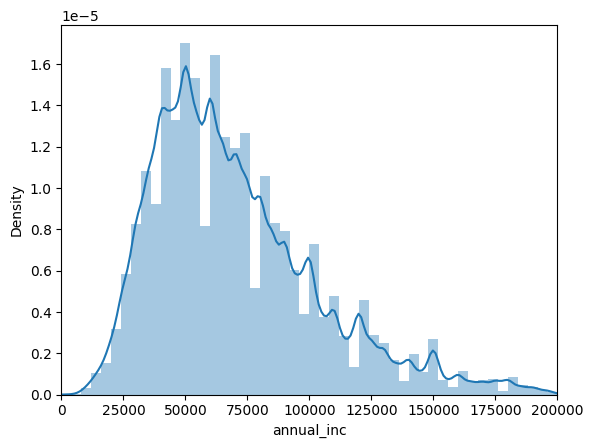

In [ ]:
sns.distplot(df1.loc[df1['annual_inc']<200000, 'annual_inc'], kde=True)
plt.xlim(0, 200000)

In [ ]:
vc = df1['title'].value_counts()
vc.head(100)

title
Debt consolidation                414001
Credit card refinancing           164331
Home improvement                   40112
Other                              31892
Debt Consolidation                 15760
Major purchase                     12051
Business                            6728
Medical expenses                    6674
Car financing                       5565
Consolidation                       5381
debt consolidation                  4834
Moving and relocation               3921
Vacation                            3805
Debt Consolidation Loan             3804
Home buying                         2365
Credit Card Consolidation           2359
consolidation                       2174
Personal Loan                       2133
Consolidation Loan                  1778
Home Improvement                    1772
Credit Card Refinance               1467
Credit Card Payoff                  1386
Consolidate                         1268
Personal                            1185
Loan      

Text(0.5, 1.0, 'Interest Rate by Subgrade')

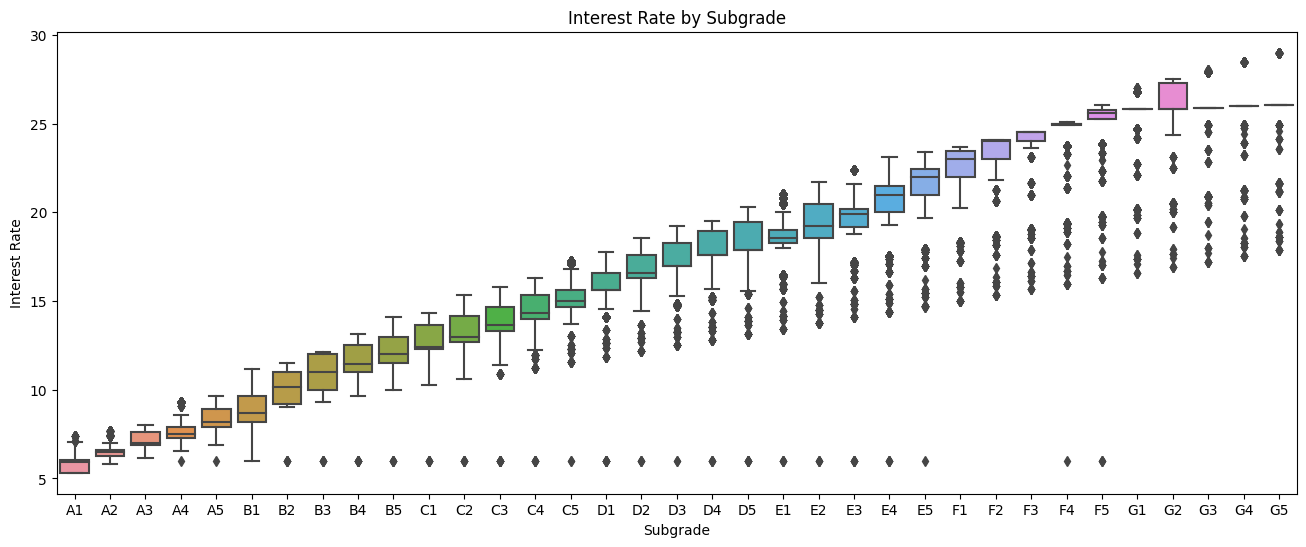

In [ ]:
ordered_subgrade = []
df1['sub_grade'].unique()
for alpha in ['A','B','C','D','E','F','G']:
    for num in range(1,6):
        s_grade = (alpha+str(num))
        if s_grade in df1['sub_grade'].unique():
            ordered_subgrade.append(s_grade)
            
            
plt.figure(figsize=(16,6))
sns.boxplot(x='sub_grade', y='int_rate', data=df1, order=ordered_subgrade)
plt.xlabel("Subgrade")
plt.ylabel("Interest Rate")
plt.title("Interest Rate by Subgrade")

Text(0.5, 1.0, 'Loan Amount by Subgrade')

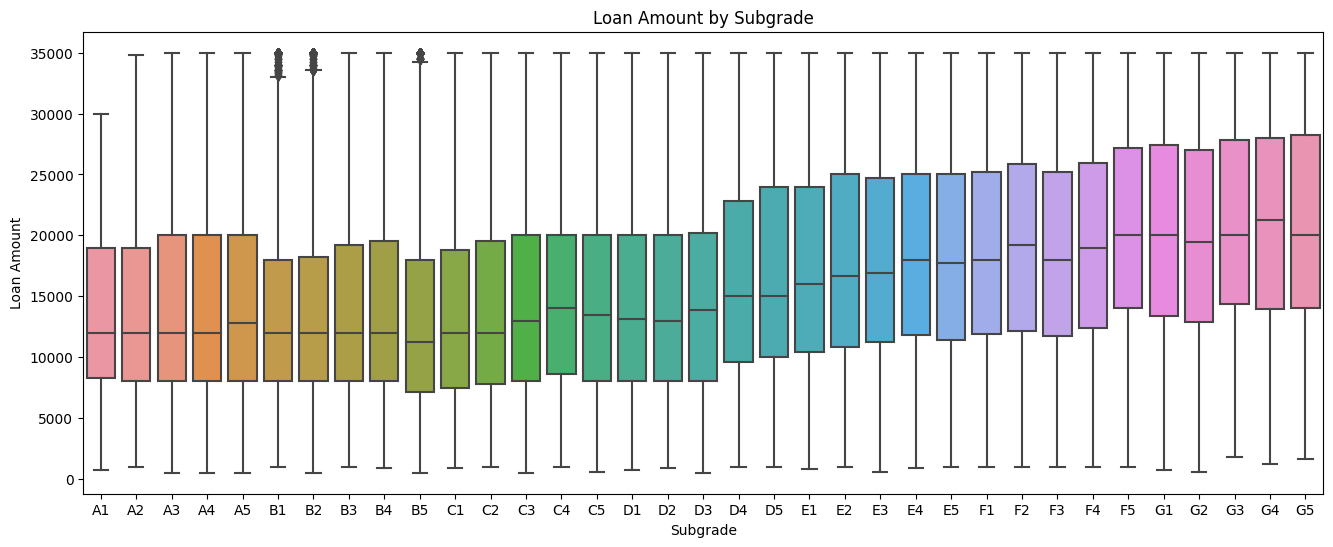

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x='sub_grade', y='loan_amnt', data=df1, order=ordered_subgrade)
plt.xlabel("Subgrade")
plt.ylabel("Loan Amount")
plt.title("Loan Amount by Subgrade")